In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

In [2]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is 468D-6BAF

 Directory of C:\Users\I NET\OneDrive\Desktop\data science\data assig\Logistic Regression

06/01/2023  11:37 PM    <DIR>          .
06/01/2023  11:37 PM    <DIR>          ..
25/12/2022  08:46 AM    <DIR>          .ipynb_checkpoints
06/01/2023  11:37 PM            29,347 bank.ipynb
25/12/2022  08:22 AM         4,610,348 bank-full.csv
25/12/2022  09:25 AM         3,751,306 bank-full2.csv
25/12/2022  08:20 AM               108 Problem-Statement(Bank_data).txt
               4 File(s)      8,391,109 bytes
               3 Dir(s)  858,026,790,912 bytes free


In [3]:
df=pd.read_csv("bank-full2.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [9]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [8]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [6]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [7]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [29]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [30]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
df=df.drop(['job','education','default','contact','day','poutcome'], axis=1)

In [13]:
df.head()

,age,marital,balance,housing,loan,month,duration,campaign,pdays,previous,y
0,58,married,2143,yes,no,may,261,1,-1,0,no
1,44,single,29,yes,no,may,151,1,-1,0,no
2,33,married,2,yes,yes,may,76,1,-1,0,no
3,47,married,1506,yes,no,may,92,1,-1,0,no
4,33,single,1,no,no,may,198,1,-1,0,no


In [21]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['y']=(le.fit_transform(df['y']))
df['marital']=(le.fit_transform(df['marital']))
df['housing']=(le.fit_transform(df['housing']))
df['loan']=(le.fit_transform(df['loan']))
df['month']=(le.fit_transform(df['month']))



In [22]:
df.head()

,age,marital,balance,housing,loan,month,duration,campaign,pdays,previous,y
0,58,1,2143,1,0,8,261,1,-1,0,0
1,44,2,29,1,0,8,151,1,-1,0,0
2,33,1,2,1,1,8,76,1,-1,0,0
3,47,1,1506,1,0,8,92,1,-1,0,0
4,33,2,1,0,0,8,198,1,-1,0,0


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scl=MinMaxScaler()
df=pd.DataFrame(scl.fit_transform(df.to_numpy()),columns=df.columns)

In [25]:
df.head()

,age,marital,balance,housing,loan,month,duration,campaign,pdays,previous,y
0,0.519481,0.5,0.092259,1.0,0.0,0.727273,0.053070,0.0,0.0,0.0,0.0
1,0.337662,1.0,0.073067,1.0,0.0,0.727273,0.030704,0.0,0.0,0.0,0.0
2,0.194805,0.5,0.072822,1.0,1.0,0.727273,0.015453,0.0,0.0,0.0,0.0
3,0.376623,0.5,0.086476,1.0,0.0,0.727273,0.018707,0.0,0.0,0.0,0.0
4,0.194805,1.0,0.072812,0.0,0.0,0.727273,0.040260,0.0,0.0,0.0,0.0


In [36]:
y=df.iloc[:,-1]
X=df.iloc[:,[0,1,2,3,4,5,6,7,8,9]]

In [41]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.40, random_state=6)

In [42]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lo.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred= lo.predict(x_test)  

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     15878
         1.0       0.61      0.16      0.26      2207

    accuracy                           0.89     18085
   macro avg       0.75      0.57      0.60     18085
weighted avg       0.86      0.89      0.85     18085



# cross validation in the logistic regressiion

In [49]:

from sklearn.linear_model import LogisticRegressionCV
model=LogisticRegressionCV(cv=20)
model.fit(x_train,y_train)

LogisticRegressionCV(cv=20)

In [50]:
y_pred=model.predict(x_test) 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     15878
         1.0       0.59      0.19      0.29      2207

    accuracy                           0.89     18085
   macro avg       0.75      0.59      0.61     18085
weighted avg       0.86      0.89      0.86     18085



In [51]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
print(cm)

[[15591   287]
 [ 1786   421]]


# ROC curve

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [55]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]

In [56]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [57]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

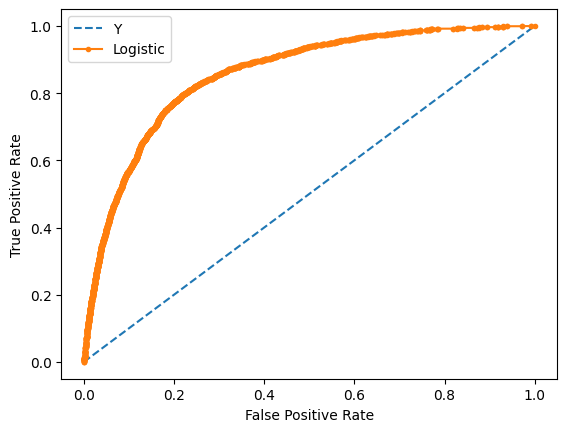

In [58]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Y')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()